<a href="https://colab.research.google.com/github/san2103/Grain-Size-Analysis/blob/main/GrainImage.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import cv2
from google.colab.patches import cv2_imshow
import tensorflow as tf
from matplotlib import pyplot as plt
import pandas as pd
from skimage.restoration import denoise_nl_means,estimate_sigma
from skimage.util import random_noise
from skimage import data, img_as_float
from skimage import feature
from skimage import filters,morphology

In [ ]:
import numpy as np
from  matplotlib import pyplot as plt
from scipy  import ndimage
from skimage import io, color, measure
from skimage.segmentation import clear_border

Collecting Data

In [ ]:
img= cv2.imread("drive/MyDrive/python projects/grain analysis/GI.jpg",0)
type(img)
#img=img[:450,:753] # check the intial shape first  =then apply size accordingly to remove scale bar
img.shape
#type(img)
#img.dtype

(432, 600)

Visualize

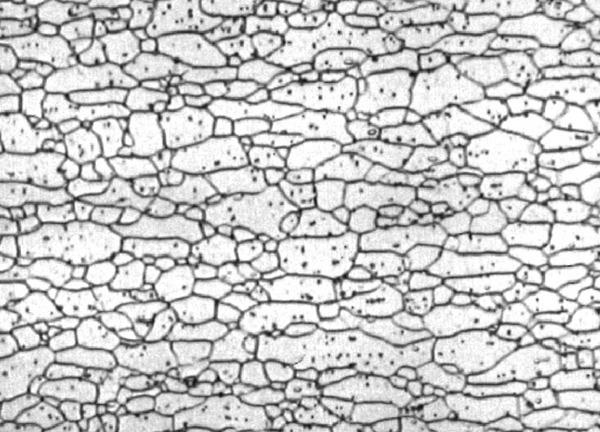

-1

In [ ]:
cv2_imshow(img)
cv2.waitKey(0)
#plt.imshow(img)

Define the pixel size to micro meter

In [ ]:
pixels_to_um = .5

##Data cleaning
Denoising if required 
Best- meadian filter, for microscopic images is `Non-Local means filter`

Median 

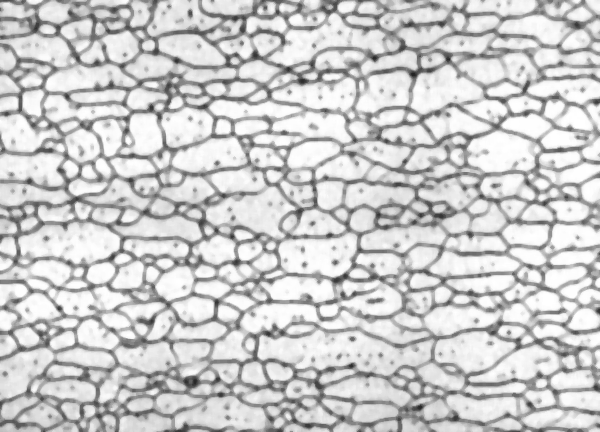

array([[ 88,  88,  88, ..., 233, 233, 234],
       [ 93,  99, 106, ..., 237, 237, 237],
       [145, 163, 177, ..., 240, 240, 240],
       ...,
       [192, 192, 195, ..., 218, 211, 209],
       [192, 193, 194, ..., 231, 229, 225],
       [190, 190, 190, ..., 233, 229, 229]], dtype=uint8)

In [ ]:
median = cv2.medianBlur(img,5)
cv2_imshow(median)
cv2.waitKey(0)
median

Non-local

estimated noise standard deviation = 0.06919568611272225


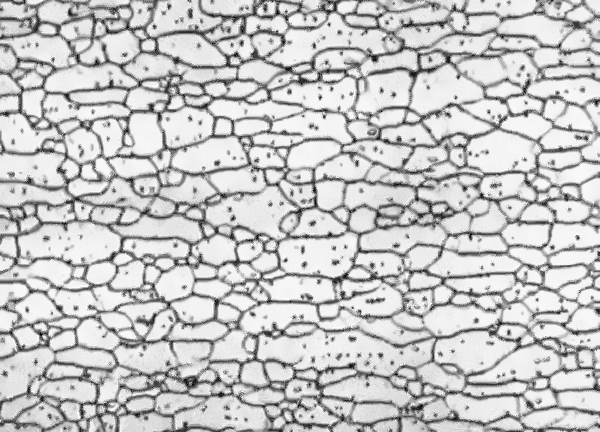

-1

In [ ]:
sigma=.08
noisy = random_noise(img, var=sigma**2)
sigma_est = np.mean(estimate_sigma(noisy))
print(f'estimated noise standard deviation = {sigma_est}')

patch_kw = dict(patch_size=5,      # 5x5 patches
                patch_distance=6) # 13x13 search area
                
denoise = denoise_nl_means(noisy, h=0.6* sigma_est, sigma=sigma_est,fast_mode=True, #(previous h was .6)
                           **patch_kw)
#plt.imshow(denoise)
#img1=denoise.astype(img.dtype)
#img1.dtype
denoise.dtype
#print(denoise)
data = denoise / denoise.max() #normalizes data in range 0 - 255
data = 255 * data
non_loc = data.astype(np.uint8)
#plt.imshow(img1)
cv2_imshow(non_loc)
cv2.waitKey(0)

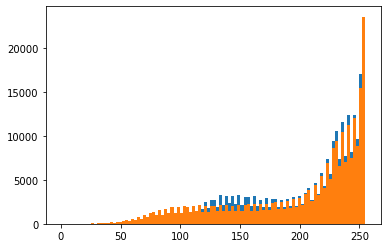

In [ ]:
hs=plt.hist(median.flat, bins = 100, range=(0,255))
hs=plt.hist(img.flat, bins = 100, range=(0,255))

valley around 200 #guess value=200

skimage.filters.thresholding.threshold_isodata
skimage.filters.thresholding.threshold_li
skimage.filters.thresholding.threshold_mean
skimage.filters.thresholding.threshold_minimum
skimage.filters.thresholding.threshold_otsu
skimage.filters.thresholding.threshold_triangle
skimage.filters.thresholding.threshold_yen


(<Figure size 1440x720 with 8 Axes>,
 array([<AxesSubplot:title={'center':'Original'}>,
        <AxesSubplot:title={'center':'Isodata'}>,
        <AxesSubplot:title={'center':'Li'}>,
        <AxesSubplot:title={'center':'Mean'}>,
        <AxesSubplot:title={'center':'Minimum'}>,
        <AxesSubplot:title={'center':'Otsu'}>,
        <AxesSubplot:title={'center':'Triangle'}>,
        <AxesSubplot:title={'center':'Yen'}>], dtype=object))

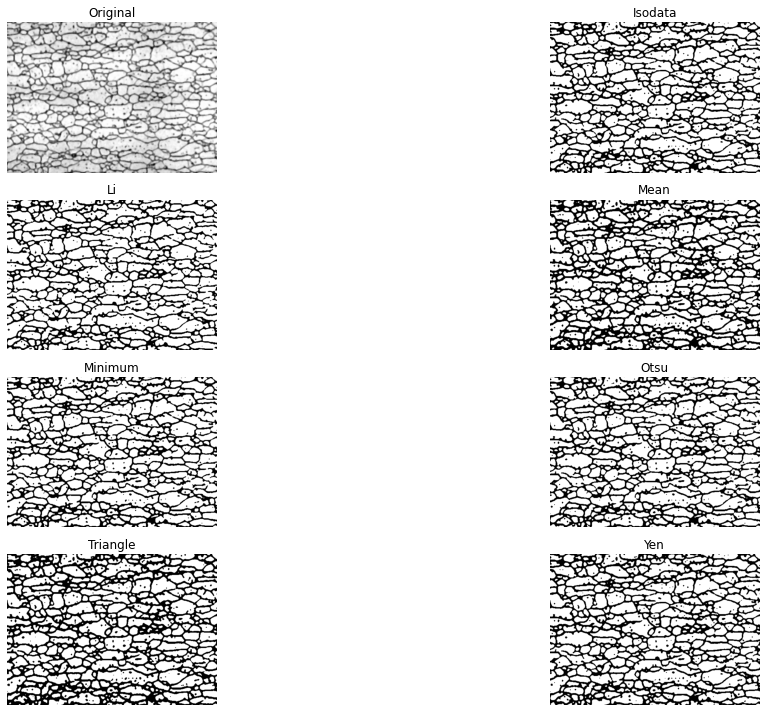

In [ ]:
filters.try_all_threshold(median, figsize=(20, 10), verbose=True)

# both otsu and mean performed good but as can be seen median threshold performed well with medianblur filtered image as it has preserved all the gb 
thresh value=202

202.43409722222222

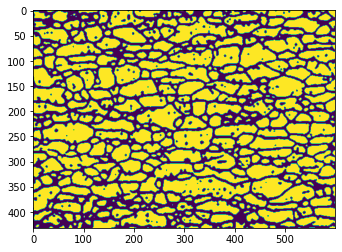

In [ ]:
from skimage.filters.thresholding import threshold_mean 
ret_mean=threshold_mean(median)
th_mean=median>ret_mean # creating boolean image
plt.imshow(th_mean)
ret_mean

th_mean value is 202. which confirmed the guess value analysis based on histogram so this can be done manually also 


#manually based on mean threshold value

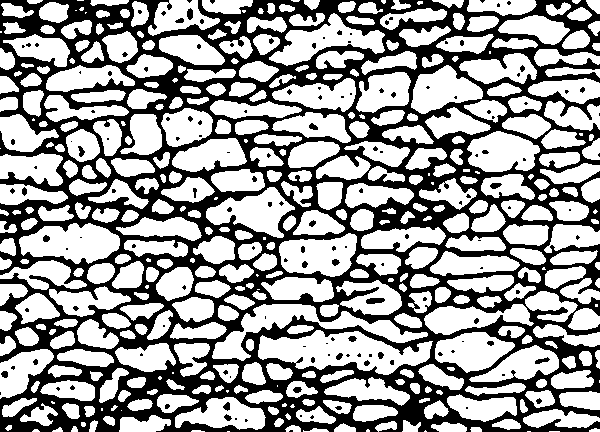

202.0

In [ ]:
ret1,thresh1 = cv2.threshold(median,ret_mean,255,cv2.THRESH_BINARY)
cv2_imshow(thresh1)
ret1

In [ ]:
his_mean=plt.hist(thresh1.flat,bins=100,range=(0,255))

In [ ]:
"""th2 = cv2.adaptiveThreshold(median,255,cv2.ADAPTIVE_THRESH_MEAN_C,\
            cv2.THRESH_BINARY,11,2)
th3 = cv2.adaptiveThreshold(median,255,cv2.ADAPTIVE_THRESH_GAUSSIAN_C,\
            cv2.THRESH_BINARY,11,2)"""

 # Auto thresholing with otsu

In [ ]:
ret,thresh = cv2.threshold(median,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(thresh)
ret

In [ ]:
gs=plt.hist(thresh.flat,bins=100,range=(0,255))

In [ ]:
cv2_imshow(thresh)
cv2.waitKey(0)
thresh.dtype
thresh.shape

#plt.imshow(thresh)

In [ ]:
#print(ret)
#print(thresh)

mean thresh worked well with median when compared to and also check the 0 intensity in histogram 


#filling holes

# Morophological Operation

In [ ]:
"""kernal = np.ones((3,3), np.uint8)
dilated = cv2.dilate(~thresh1, kernal, iterations =1)
cv2_imshow(dilated)
cv2.waitKey(0)"""

In [ ]:
"""eroded = cv2.erode(dilated,kernal, iterations=1)
cv2_imshow(eroded)
cv2.waitKey(0)
#plt.imshow(dilated)
good=~eroded"""

In [ ]:
"""cv2_imshow(good)
cv2.waitKey(0) """#producced over segmentation for small regions caused them to diappear

Morphology didn't help caused small grains to *disappear* with large intensity

## creating mask and filling holes

/usr/local/lib/python3.9/dist-packages/skimage/_shared/utils.py:157: UserWarning: Any labeled images will be returned as a boolean array. Did you mean to use a boolean array?
  return func(*args, **kwargs)


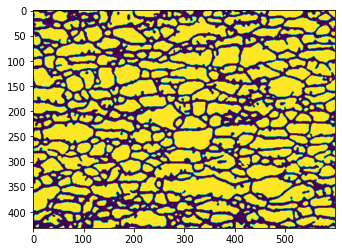

In [ ]:
mask = morphology.remove_small_objects(thresh1, 50,connectivity=img.ndim)
mask = morphology.remove_small_holes(thresh1, 50,connectivity=img.ndim)
plt.imshow(mask)

caused some grains to disappear but with less intensity


#Creating Mask without filling holes function 
Converting the thresholded image into binary image

In [ ]:
"""mask = thresh1 == 255
#mask
plt.imshow(mask)"""

'mask = thresh1 == 255\n#mask\nplt.imshow(mask)'

In [ ]:
#len(mask)
#mask.shape

In [ ]:
"""mask = ndimage.binary_fill_holes(mask)
mask.dtype
plt.imshow(mask)
""" # this also did the same caused small grains to disappear

'mask = ndimage.binary_fill_holes(mask)\nmask.dtype\nplt.imshow(mask)\n'

In [ ]:
#plt.imshow(mask)
#cv2_imshow(mask)
#cv2.waitKey(0)

##Labelling the masked objects(grains) and Measuring the number of grains

Clearing the partially touching grains 

(432, 600)

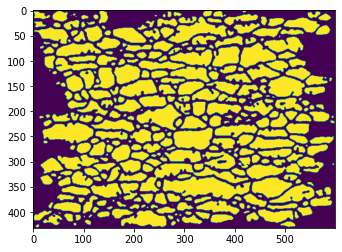

In [ ]:
mask=clear_border(mask)
plt.imshow(mask)
mask.shape

In [ ]:
"""labeled_mask,num_labels=measure.label(mask,return_num=True,connectivity=img.ndim)
num_labels"""

'labeled_mask,num_labels=measure.label(mask,return_num=True,connectivity=img.ndim)\nnum_labels'

In [ ]:
"""cut_img=color.label2rgb(mask,bg_label=0)
plt.imshow(cut_img)"""

'cut_img=color.label2rgb(mask,bg_label=0)\nplt.imshow(cut_img)'

In [ ]:
#first using the scipy function
"""s=[[1,1,1],[1,1,1],[1,1,1]] #orthogonal connectivity same as image software
labeled_mask1,num_labels1=ndimage.label(mask,structure=s)
labeled_mask1.shape
num_labels1"""

's=[[1,1,1],[1,1,1],[1,1,1]] #orthogonal connectivity same as image software\nlabeled_mask1,num_labels1=ndimage.label(mask,structure=s)\nlabeled_mask1.shape\nnum_labels1'

In [ ]:
##checking with skimage
labeled_mask,num_labels=measure.label(mask,return_num=True,connectivity=img.ndim)
num_labels
#type(labeled_mask)

345

Both skimage measure.label and scipy ndimage gave same number of objects

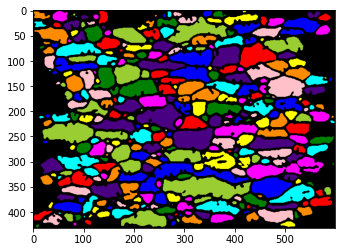

In [ ]:
cut_img=color.label2rgb(labeled_mask,bg_label=0)
plt.imshow(cut_img)

In [ ]:
"""
clusters = measure.regionprops(labeled_mask)
#print(clusters[0].area)
sum=0
for prop in clusters:
  #print('Labels:{} Area:{}'. format(prop.label,prop.area))
   sum=sum+(prop.area)*.5**2
print(sum)
"""

"\nclusters = measure.regionprops(labeled_mask)\n#print(clusters[0].area)\nsum=0\nfor prop in clusters:\n  #print('Labels:{} Area:{}'. format(prop.label,prop.area))\n   sum=sum+(prop.area)*.5**2\nprint(sum)\n"

In [ ]:
"""avg=sum/num_labels
print(avg)
"""

'avg=sum/num_labels\nprint(avg)\n'

In [ ]:
#grains=pd.DataFrame(clusters)
#grains.to_csv("drive/MyDrive/python projects/grain analysis/new.csv")



In [ ]:
#proplist=['area','equivalent_diameter','perimeter']


In [ ]:
"""output_file=open('image_measurements1.csv','w')
output_file.write((','+",".join(proplist)+'\n'))
for cluster_prop in clusters:
  output_file.write(str('label'))
  for i, prop in enumerate(proplist):
      if(prop == 'area'):
        to_print =cluster_prop[prop]*pixels_to_um**2
      
      else:
          to_print=cluster_prop[prop]*pixels_to_um
      output_file.write(','+str(to_print))
  output_file.write('\n')       
"""

'output_file=open(\'image_measurements1.csv\',\'w\')\noutput_file.write((\',\'+",".join(proplist)+\'\n\'))\nfor cluster_prop in clusters:\n  output_file.write(str(\'label\'))\n  for i, prop in enumerate(proplist):\n      if(prop == \'area\'):\n        to_print =cluster_prop[prop]*pixels_to_um**2\n      \n      else:\n          to_print=cluster_prop[prop]*pixels_to_um\n      output_file.write(\',\'+str(to_print))\n  output_file.write(\'\n\')       \n'

##Calculating Average grain size

In [ ]:
clusters = measure.regionprops(labeled_mask) # returns a list 
grain_size=0;
for props in clusters:
  grain_size=grain_size+(props.equivalent_diameter)*pixels_to_um
print(grain_size)

3193.3442449053277


Average grain size

In [ ]:
Avg_grain_size=grain_size/num_labels
Avg_grain_size

9.256070275087907

calculations using pandas library

In [ ]:
props = measure.regionprops_table(labeled_mask,properties=['equivalent_diameter']) # returns a dictionary
p=pd.DataFrame(props)                          
p.head()
p['equivalent_diameter'] =   p['equivalent_diameter']*pixels_to_um 
avg=np.mean(p['equivalent_diameter'])
avg

9.256070275087911

##Canny Edge Detection 


In [ ]:
#Auto Canny
sigma=0.3
median=np.median(thresh1)
lower =int(max(0,(1.0-sigma)*median))
upper=int(min(255,(1.0+sigma)*median))
print(lower)
print(upper)

178
255


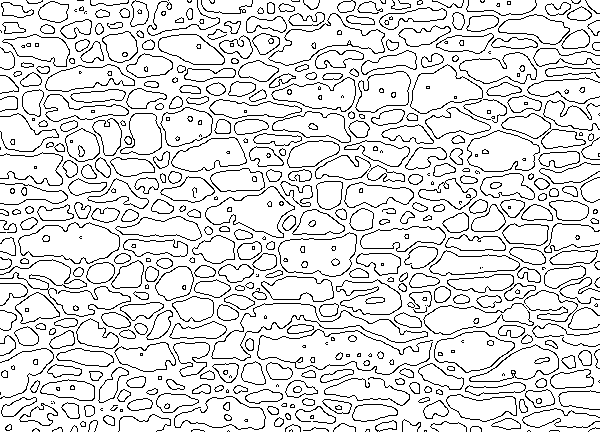

-1

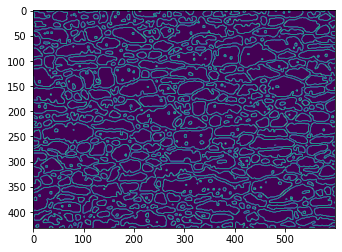

In [ ]:
 #edges= feature.canny(thresh,sigma=3)
 #plt.imshow(edges)
 #thresh1=np.uint8(edges)
edges=cv2.Canny(thresh1,lower,upper) #Canny did not work on thresh matrixs of this image so taking img1 only
#edges.dtype 
#plt.imshow(~edges)
#edges=clear_border(edges)
plt.imshow(edges)
#plt.imshow(~edges)
dataed= edges/edges .max() #normalizes data in range 0 - 255
data = 255 * dataed
imged = data.astype(np.uint8)
cv2_imshow(~imged)
cv2.waitKey(0)

# Sobel edge detection


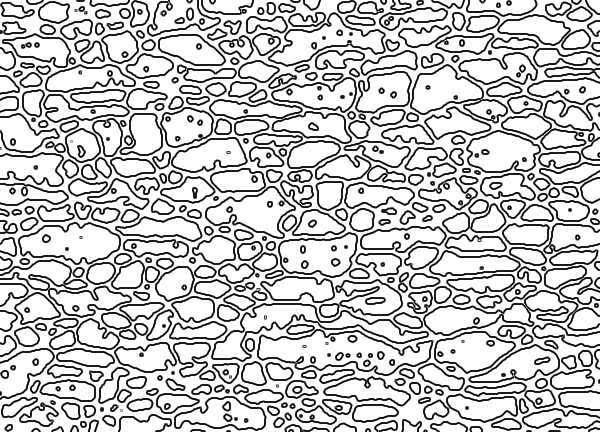

-1

In [ ]:
hl=filters.sobel(thresh1)
#plt.imshow(hl)
hl.dtype
hl = hl/ hl.max() #normalizes data in range 0 - 255
sedge = 255 * hl
sedge = sedge.astype(np.uint8)
cv2_imshow(~sedge)
cv2.waitKey(0)

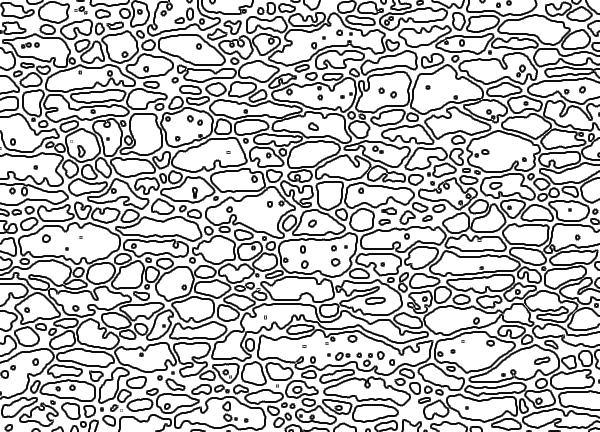

-1

In [ ]:
pr = filters.prewitt(thresh1)
#io.imshow(pr,cmap='gray')
kernel = np.ones((3,3),np.uint8)
datapr= pr / pr.max() #normalizes data in range 0 - 255
data = 255 * datapr
img2 = data.astype(np.uint8)
cv2_imshow(~img2)
cv2.waitKey(0)

All filters leaded to over segmentations

##Watershed with Distance transform

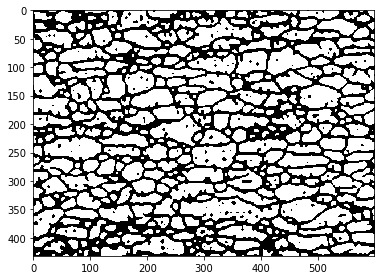

In [ ]:
# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(thresh1,cv2.MORPH_OPEN,kernel, iterations = 1) # to remove noise
closing = cv2.morphologyEx(~thresh1,cv2.MORPH_CLOSE,kernel, iterations = 1) #to remove holes
# sure background area
#opening=clear_border(opening)
#ret1,thresh1 = cv2.threshold(img1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
sure_bg = cv2.dilate(thresh1,kernel,iterations=1) #(good is same as closing)
#sure_bg=cv2.morphologyEx(~thresh,cv2.MORPH_CLOSE,kernel, iterations = 3)
# Finding sure foreground area
dist_transform = cv2.distanceTransform(opening,cv2.DIST_L2,5)
ret, sure_fg = cv2.threshold(dist_transform,0.01*dist_transform.max(),255,0)
# Finding unknown region
sure_fg = np.uint8(sure_fg)
unknown = cv2.subtract(sure_bg,sure_fg)
io.imshow(sure_fg,cmap='gray')
sure_fg = ndimage.binary_fill_holes(sure_fg.astype(int))
sure_fg=np.uint8(sure_fg)
sure_fg[sure_fg==1]=255

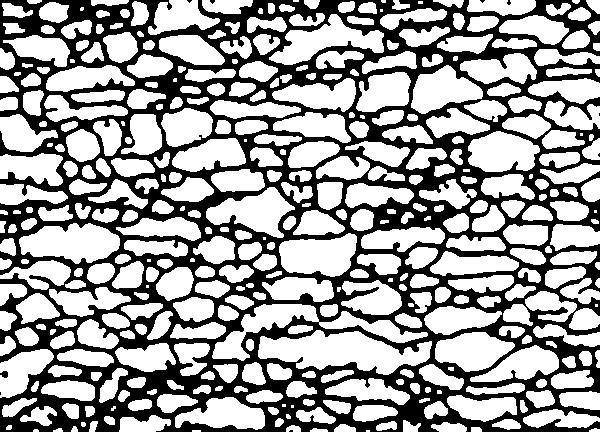

-1

In [ ]:
#plt.imshow(sure_fg,cmap='gray')
#plt.imshow(unknown)
I=cv2.cvtColor(sure_fg, cv2.COLOR_BGR2RGB)
cv2_imshow(I)
cv2.waitKey(0)

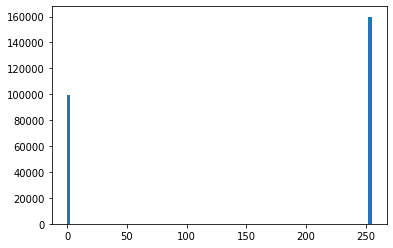

In [ ]:
hs_sure_fg=plt.hist(sure_fg.flat, bins=100, range=(0,255))

In [ ]:
# Marker labelling
ret, markers = cv2.connectedComponents(sure_fg)
# Add one to all labels so that sure background is not 0, but 1
markers = markers+10 #commenout  when holes are not removed?
# Now, mark the region of unknown with zero
markers[unknown==255] = 0
print(ret)
#type(markers)
#plt.imshow(markers)
markers.dtype
markers

397


array([[ 10,  10,  10, ...,  25,  25,  25],
       [ 10,  10,  10, ...,  25,  25,  25],
       [ 10,   0,   0, ...,  25,  25,  25],
       ...,
       [ 10,  10,  10, ..., 404, 404, 404],
       [ 10,  10,  10, ..., 404, 404, 404],
       [ 10,  10,  10, ..., 404, 404, 404]], dtype=int32)

In [ ]:
"""markers = morphology.remove_small_objects(markers, 50,connectivity=img.ndim)
markers = morphology.remove_small_holes(markers, 50,connectivity=img.ndim)
plt.imshow(markers)
markers.dtype
markers=markers.astype(np.uint32)
markers
"""

'markers = morphology.remove_small_objects(markers, 50,connectivity=img.ndim)\nmarkers = morphology.remove_small_holes(markers, 50,connectivity=img.ndim)\nplt.imshow(markers)\nmarkers.dtype\nmarkers=markers.astype(np.uint32)\nmarkers\n'

In [ ]:
img2= cv2.imread("drive/MyDrive/python projects/grain analysis/GI.jpg")

Applying watershed

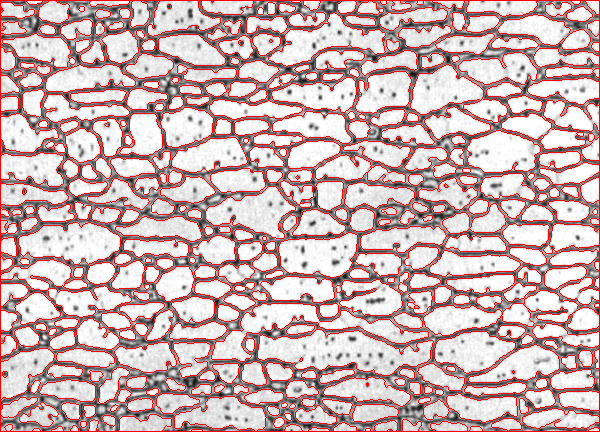

dtype('int32')

In [ ]:
markers = cv2.watershed(img2,markers)
img2[markers == -1] = [0,0,255]
cv2_imshow(img2)
cv2.waitKey(0)
markers.dtype

(432, 600)

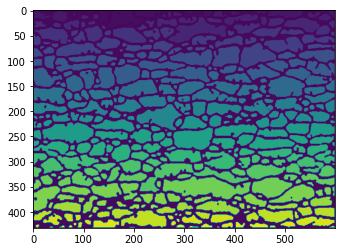

In [ ]:


labeled_mask1=clear_border(markers)
plt.imshow(labeled_mask1)
labeled_mask.shape

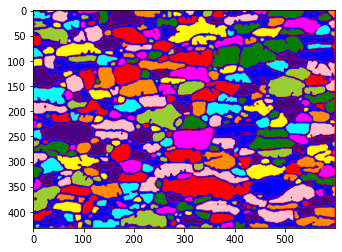

In [ ]:
img_w=color.label2rgb(markers,bg_label=0)
plt.imshow(img_w)
#cv2_imshow(img_w)
#cv2.waitKey(0)

In [ ]:
#markers=clear_border(markers)
#markers.shape
#plt.imshow(markers)

In [ ]:
""""img_w1=color.label2rgb(markers,bg_label=0)
plt.imshow(img_w1)"""

'"img_w1=color.label2rgb(markers,bg_label=0)\nplt.imshow(img_w1)'

In [ ]:
clusters = measure.regionprops(markers)
grain_size=0;
for props in clusters:
  grain_size=grain_size+(props.equivalent_diameter)*0.5
print(grain_size)

3957.2098243635114


In [ ]:
Avg_grain_size=grain_size/ret
Avg_grain_size

9.967782932905571

In [ ]:
props_w = measure.regionprops_table(markers,properties=['equivalent_diameter']) # returns a dictionary
w=pd.DataFrame(props_w)                          
w.head()
w['equivalent_diameter'] =   w['equivalent_diameter']*pixels_to_um 
avg_w=np.mean(w['equivalent_diameter'])
avg_w

9.967782932905573

In [ ]:
#image = tf.image.convert_image_dtype(thresh, tf.float32)

In [ ]:
"""
nn = tf.image.resize(img, (244,244), method='nearest')
image = tf.image.convert_image_dtype(nn, tf.float32)
mask2=tf.constant(image)
labeled2=mask2.numpy()
type(labeled2)
plt.imshow(image)
"""

"\nnn = tf.image.resize(img, (244,244), method='nearest')\nimage = tf.image.convert_image_dtype(nn, tf.float32)\nmask2=tf.constant(image)\nlabeled2=mask2.numpy()\ntype(labeled2)\nplt.imshow(image)\n"

##K-means

In [ ]:
img3=cv2.imread("drive/MyDrive/python projects/grain analysis/GI.jpg")
img3.shape

(432, 600, 3)

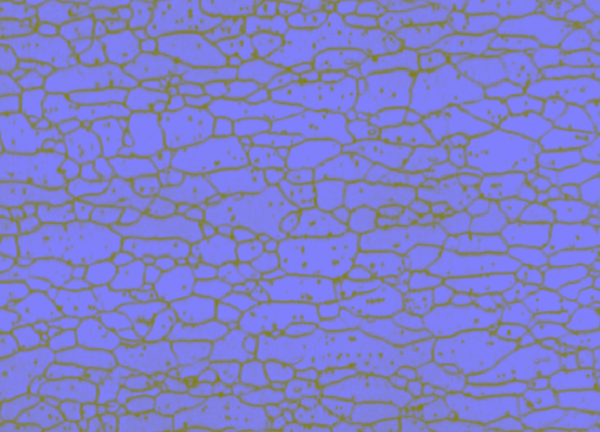

In [ ]:
#To know how many colors in the image
lab=cv2.cvtColor(img3,cv2.COLOR_BGR2LAB)
cv2_imshow(lab)

# Intensity information from lab image desrcibes only two color hence K=2 taken
# Elbow method is used for confirmation

In [ ]:
#Elbow Method
"""from sklearn.cluster import KMeans
X = img3.reshape((-1,3))
X = np.float32(X)
wcss=[]
for i in range(1,11):
  kmeans = KMeans(n_clusters=i, init='k-means++',random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)
plt.plot(range(1,11),wcss)
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()
"""  

"from sklearn.cluster import KMeans\nX = img3.reshape((-1,3))\nX = np.float32(X)\nwcss=[]\nfor i in range(1,11):\n  kmeans = KMeans(n_clusters=i, init='k-means++',random_state=0)\n  kmeans.fit(X)\n  wcss.append(kmeans.inertia_)\nplt.plot(range(1,11),wcss)\nplt.title('The Elbow Method')\nplt.xlabel('Number of clusters')\nplt.ylabel('WCSS')\nplt.show()\n"

In [ ]:
Z = img3.reshape((-1,3))
# convert to np.float32
Z = np.float32(Z)
# define criteria, number of clusters(K) and apply kmeans()
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 2
attempts=10
ret,label,center=cv2.kmeans(Z,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center = np.uint8(center)
res = center[label.flatten()]
res2 = res.reshape((img3.shape))
#cv2_imshow(res2)
#cv2.waitKey(0)
#cv.destroyAllWindows()
#len(label)
#res2
#center
#plt.imshow(res2,cmap="jet")


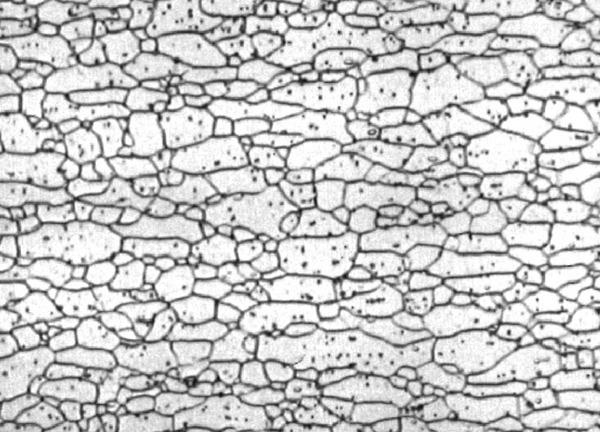

-1

In [ ]:
_img3 = cv2.cvtColor(res2, cv2.COLOR_BGR2RGB)
cv2_imshow(img3)
cv2.waitKey(0)


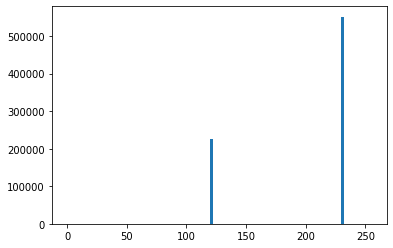

In [ ]:
hs=plt.hist(res2.flat, bins = 100, range=(0,255))
#hs=plt.hist(img3.flat, bins = 100, range=(0,255))

In [ ]:
#Manual method of masking

In [ ]:
"""mask2=res2==233
labeled_mask2,num_labels2=ndimage.label(mask2)
labeled_mask2.shape
num_labels2"""

'mask2=res2==233\nlabeled_mask2,num_labels2=ndimage.label(mask2)\nlabeled_mask2.shape\nnum_labels2'

#color based segmentation

In [ ]:
"""
img4=cv2.imread("drive/MyDrive/python projects/grain analysis/GI.jpg")
#BGR
blueChannel = img4[:, :, 0]
greenChannel = img4[:, :, 1]
redChannel = img4[:, :, 2]
data1=([redChannel.reshape((-1,3)),greenChannel.reshape((-1,3)),blueChannel.reshape((-1,3))])
data1=np.array(data1)
data1=data1.reshape((-1,3))
data1=np.float32(data1)
criteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)
K = 3
attempts=10
ret1,label1,center1=cv2.kmeans(data1,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)
# Now convert back into uint8, and make original image
center1 = np.uint8(center1)
res1 = center1[label1.flatten()]
res3 = res1.reshape((img4.shape))
cv2_imshow(res3)
cv2.waitKey(0)
data1.shape
"""

'\nimg4=cv2.imread("drive/MyDrive/python projects/grain analysis/GI.jpg")\n#BGR\nblueChannel = img4[:, :, 0]\ngreenChannel = img4[:, :, 1]\nredChannel = img4[:, :, 2]\ndata1=([redChannel.reshape((-1,3)),greenChannel.reshape((-1,3)),blueChannel.reshape((-1,3))])\ndata1=np.array(data1)\ndata1=data1.reshape((-1,3))\ndata1=np.float32(data1)\ncriteria = (cv2.TERM_CRITERIA_EPS + cv2.TERM_CRITERIA_MAX_ITER, 10, 1.0)\nK = 3\nattempts=10\nret1,label1,center1=cv2.kmeans(data1,K,None,criteria,attempts,cv2.KMEANS_RANDOM_CENTERS)\n# Now convert back into uint8, and make original image\ncenter1 = np.uint8(center1)\nres1 = center1[label1.flatten()]\nres3 = res1.reshape((img4.shape))\ncv2_imshow(res3)\ncv2.waitKey(0)\ndata1.shape\n'

In [ ]:
# based on manual method
"""clusters = measure.regionprops(labeled_mask2)
grain_size=0;
for props in clusters:
  grain_size=grain_size+(props.equivalent_diameter)*0.5
print(grain_size)
Avg_grain_size=grain_size/num_labels2
Avg_grain_size
"""

'clusters = measure.regionprops(labeled_mask2)\ngrain_size=0;\nfor props in clusters:\n  grain_size=grain_size+(props.equivalent_diameter)*0.5\nprint(grain_size)\nAvg_grain_size=grain_size/num_labels2\nAvg_grain_size\n'

In [ ]:
"""from skimage.color.colorlabel import label2rgb
im=label2rgb(markers,image=img2)
plt.imshow(im)
"""

'from skimage.color.colorlabel import label2rgb\nim=label2rgb(markers,image=img2)\nplt.imshow(im)\n'

#Masking res2, importing label function from skimage which is able to do for 3 channel image

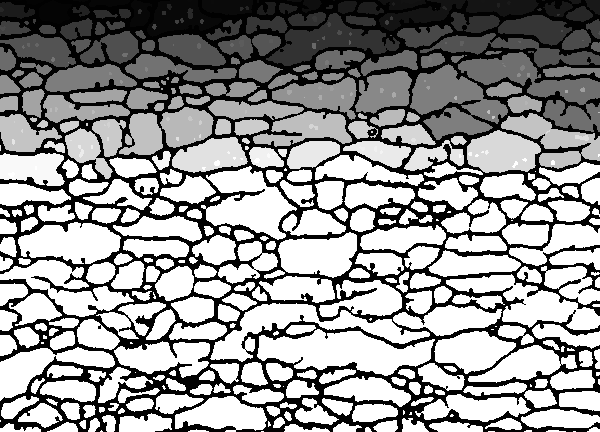

689

In [ ]:
last,retf=measure.label(res2,return_num=True,connectivity=img3.ndim)
cv2_imshow(last)
retf

In [ ]:
clusters = measure.regionprops(last)
grain_size=0;
for props in clusters:
  grain_size=grain_size+(props.equivalent_diameter)*0.5
print(grain_size)
Avg_grain_size=grain_size/retf
Avg_grain_size

2796.1158192193166


4.058223249955467

In [ ]:
props_k = measure.regionprops_table(last,properties=['equivalent_diameter']) # returns a dictionary
p_k=pd.DataFrame(props_k)    
p_k['equivalent_diameter'] =   p_k['equivalent_diameter']*pixels_to_um                
p_k.head()
avg_k=np.mean(p['equivalent_diameter'])
avg_k

9.256070275087911

In [ ]:
#im1=label2rgb(res2,image=img3)
#last1=last.reshape(img2.shape)
#last1.shape

In [ ]:
#im2=color.label2rgb(last1,bg_label=0)
#plt.imshow(im2)

In [ ]:
"""from google.colab import drive
drive.mount('/content/drive')
"""

"from google.colab import drive\ndrive.mount('/content/drive')\n"

In [ ]:
"""# noise removal
kernel = np.ones((3,3),np.uint8)
opening = cv2.morphologyEx(edges,cv2.MORPH_OPEN,kernel, iterations = 1) # to remove noise
closing = cv2.morphologyEx(~thresh,cv2.MORPH_CLOSE,kernel, iterations = 1) #to remove holes
# sure background area
#opening=clear_border(opening)
#ret1,thresh1 = cv2.threshold(img1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
sure_fg_gb = cv2.dilate(edges,kernel,iterations=1) #(good is same as closing)
#sure_bg=cv2.morphologyEx(~thresh,cv2.MORPH_CLOSE,kernel, iterations = 3)
# Finding sure foreground area
sure_bg_grains=cv2.erode(~edges,kernel,iterations=1)
ret1, sure_fg1 = ret,thresh = cv2.threshold(sure_bg_grains,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)
print(sure_fg1)
io.imshow(sure_fg1)
print(ret1)"""

'# noise removal\nkernel = np.ones((3,3),np.uint8)\nopening = cv2.morphologyEx(edges,cv2.MORPH_OPEN,kernel, iterations = 1) # to remove noise\nclosing = cv2.morphologyEx(~thresh,cv2.MORPH_CLOSE,kernel, iterations = 1) #to remove holes\n# sure background area\n#opening=clear_border(opening)\n#ret1,thresh1 = cv2.threshold(img1,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)\nsure_fg_gb = cv2.dilate(edges,kernel,iterations=1) #(good is same as closing)\n#sure_bg=cv2.morphologyEx(~thresh,cv2.MORPH_CLOSE,kernel, iterations = 3)\n# Finding sure foreground area\nsure_bg_grains=cv2.erode(~edges,kernel,iterations=1)\nret1, sure_fg1 = ret,thresh = cv2.threshold(sure_bg_grains,0,255,cv2.THRESH_BINARY+cv2.THRESH_OTSU)\nprint(sure_fg1)\nio.imshow(sure_fg1)\nprint(ret1)'

In [ ]:
"""ws=plt.hist(sure_fg.flat,bins=100,range=(0,255))"""

'ws=plt.hist(sure_fg.flat,bins=100,range=(0,255))'

In [ ]:
"""# Marker labelling
ret1, markers1 = cv2.connectedComponents(sure_fg1)
# Add one to all labels so that sure background is not 0, but 1
#markers = markers+10 #commenout  when holes are not removed?
# Now, mark the region of unknown with zero
markers1[sure_fg_gb] = 0
#print(ret)
#type(markers)
#markers"""

'# Marker labelling\nret1, markers1 = cv2.connectedComponents(sure_fg1)\n# Add one to all labels so that sure background is not 0, but 1\n#markers = markers+10 #commenout  when holes are not removed?\n# Now, mark the region of unknown with zero\nmarkers1[sure_fg_gb] = 0\n#print(ret)\n#type(markers)\n#markers'

In [ ]:
"""markers1 = cv2.watershed(img2,markers1)
img2[markers == -1] = [255,0,0]
cv2_imshow(img2)
cv2.waitKey(0)"""

'markers1 = cv2.watershed(img2,markers1)\nimg2[markers == -1] = [255,0,0]\ncv2_imshow(img2)\ncv2.waitKey(0)'

In [ ]:
"""w2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)
dist_transform2 = cv2.distanceTransform(~w2,cv2.DIST_L2,5)"""
#ret2, sure_fg2 = cv2.threshold(dist_transform2,0.01*dist_transform.max(),255,0)

'w2=cv2.cvtColor(img2,cv2.COLOR_BGR2GRAY)\ndist_transform2 = cv2.distanceTransform(~w2,cv2.DIST_L2,5)'

In [ ]:
dist_transform2=np.uint8(dist_transform)
ret2,markers2 = cv2.connectedComponents(dist_transform2)

In [ ]:
"""imgr=cv2.imread("drive/MyDrive/python projects/grain analysis/GI.jpg")"""

'imgr=cv2.imread("drive/MyDrive/python projects/grain analysis/GI.jpg")'

In [ ]:
"""markers2 = cv2.watershed(imgr,markers2)
imgr[markers == -1] = [255,0,0]
cv2_imshow(imgr)
cv2.waitKey(0)"""

'markers2 = cv2.watershed(imgr,markers2)\nimgr[markers == -1] = [255,0,0]\ncv2_imshow(imgr)\ncv2.waitKey(0)'

In [ ]:
"""img_w2=color.label2rgb(markers2)
plt.imshow(img_w2)"""

'img_w2=color.label2rgb(markers2)\nplt.imshow(img_w2)'

In [ ]:
"""clusters = measure.regionprops(markers2)
grain_size2=0;
for props in clusters:
  grain_size2=grain_size2+(props.equivalent_diameter)*0.5
print(grain_size2)"""

'clusters = measure.regionprops(markers2)\ngrain_size2=0;\nfor props in clusters:\n  grain_size2=grain_size2+(props.equivalent_diameter)*0.5\nprint(grain_size2)'

In [ ]:
"""Avg_grain_size=grain_size2/ret2
Avg_grain_size"""

'Avg_grain_size=grain_size2/ret2\nAvg_grain_size'